# Análisis Exploratorio de Datos de Instacart (plataforma de entrega de comestibles)

## Introducción

Instacart es una plataforma de entregas de comestibles donde la clientela puede registrar un pedido y hacer que se lo entreguen, similar a Uber Eats y Door Dash.
El conjunto de datos que te hemos proporcionado tiene modificaciones del original. Redujimos el tamaño del conjunto para que tus cálculos se hicieran más rápido e introdujimos valores ausentes y duplicados. Tuvimos cuidado de conservar las distribuciones de los datos originales cuando hicimos los cambios.

Debes completar tres pasos. Para cada uno de ellos, escribe una breve introducción que refleje con claridad cómo pretendes resolver cada paso, y escribe párrafos explicatorios que justifiquen tus decisiones al tiempo que avanzas en tu solución.  También escribe una conclusión que resuma tus hallazgos y elecciones.


## Diccionario de datos

Hay cinco tablas en el conjunto de datos, y tendrás que usarlas todas para hacer el preprocesamiento de datos y el análisis exploratorio de datos. A continuación se muestra un diccionario de datos que enumera las columnas de cada tabla y describe los datos que contienen.

- `instacart_orders.csv`: cada fila corresponde a un pedido en la aplicación Instacart.
    - `'order_id'`: número de ID que identifica de manera única cada pedido.
    - `'user_id'`: número de ID que identifica de manera única la cuenta de cada cliente.
    - `'order_number'`: el número de veces que este cliente ha hecho un pedido.
    - `'order_dow'`: día de la semana en que se hizo el pedido (0 si es domingo).
    - `'order_hour_of_day'`: hora del día en que se hizo el pedido.
    - `'days_since_prior_order'`: número de días transcurridos desde que este cliente hizo su pedido anterior.
- `products.csv`: cada fila corresponde a un producto único que pueden comprar los clientes.
    - `'product_id'`: número ID que identifica de manera única cada producto.
    - `'product_name'`: nombre del producto.
    - `'aisle_id'`: número ID que identifica de manera única cada categoría de pasillo de víveres.
    - `'department_id'`: número ID que identifica de manera única cada departamento de víveres.
- `order_products.csv`: cada fila corresponde a un artículo pedido en un pedido.
    - `'order_id'`: número de ID que identifica de manera única cada pedido.
    - `'product_id'`: número ID que identifica de manera única cada producto.
    - `'add_to_cart_order'`: el orden secuencial en el que se añadió cada artículo en el carrito.
    - `'reordered'`: 0 si el cliente nunca ha pedido este producto antes, 1 si lo ha pedido.
- `aisles.csv`
    - `'aisle_id'`: número ID que identifica de manera única cada categoría de pasillo de víveres.
    - `'aisle'`: nombre del pasillo.
- `departments.csv`
    - `'department_id'`: número ID que identifica de manera única cada departamento de víveres.
    - `'department'`: nombre del departamento.

# Paso 1. Descripción de los datos

Lee los archivos de datos (`/datasets/instacart_orders.csv`, `/datasets/products.csv`, `/datasets/aisles.csv`, `/datasets/departments.csv` y `/datasets/order_products.csv`) con `pd.read_csv()` usando los parámetros adecuados para leer los datos correctamente. Verifica la información para cada DataFrame creado.


## Plan de solución

**Descripción de los datos.**  
Imprimir mediante el método info en cada dataset para revisar si tienen datos nulos y si pandas esta leyendo bien cada fila**

In [ ]:
# Importar librerías
import pandas as pd
from matplotlib import pyplot as plt

In [ ]:
# Leer conjuntos de datos en los DataFrames
insta_orders = pd.read_csv("instacart_orders.csv", sep=";")
products = pd.read_csv("products.csv", sep=";")
aisles= pd.read_csv("aisles.csv", sep = ";")
departments = pd.read_csv("departments.csv", sep = ";")
order_products = pd.read_csv("order_products.csv", sep = ";")

Imprimí las primeras filas con head() para ver los datos porque me estaba marcando error al dar info, así que regrese e imprimí head() para cada una y con esto me di cuenta cual era el separador correcto.

In [3]:
print(insta_orders.head(1))
print()
print(products.head(1))
print()
print(aisles.head(1))
print()
print(departments.head(1))
print()
print(order_products.head(1))

   order_id  user_id  order_number  order_dow  order_hour_of_day  \
0   1515936   183418            11          6                 13   

   days_since_prior_order  
0                    30.0  

   product_id                product_name  aisle_id  department_id
0           1  Chocolate Sandwich Cookies        61             19

   aisle_id                  aisle
0         1  prepared soups salads

   department_id department
0              1     frozen

   order_id  product_id  add_to_cart_order  reordered
0   2141543       11440               17.0          0


In [ ]:
# Mostrar información del DataFrame 1
insta_orders.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478967 entries, 0 to 478966
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                478967 non-null  int64  
 1   user_id                 478967 non-null  int64  
 2   order_number            478967 non-null  int64  
 3   order_dow               478967 non-null  int64  
 4   order_hour_of_day       478967 non-null  int64  
 5   days_since_prior_order  450148 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 21.9 MB


In [ ]:
# Mostrar información del DataFrame 2
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49694 entries, 0 to 49693
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49694 non-null  int64 
 1   product_name   48436 non-null  object
 2   aisle_id       49694 non-null  int64 
 3   department_id  49694 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [ ]:
# Mostrar información del DataFrame 3
aisles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   aisle_id  134 non-null    int64 
 1   aisle     134 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.2+ KB


In [ ]:
# Mostrar información del DataFrame 4
departments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     int64 
 1   department     21 non-null     object
dtypes: int64(1), object(1)
memory usage: 468.0+ bytes


In [ ]:
# Mostrar información del DataFrame 5
order_products.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   order_id           4545007 non-null  int64  
 1   product_id         4545007 non-null  int64  
 2   add_to_cart_order  4544171 non-null  float64
 3   reordered          4545007 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 138.7 MB


<div style="border: 1px solid #616161; padding: 12px; border-radius: 8px; background: #D6D6D6; color: #000000;">

## Conclusiones de la descripcion de los datos

Gracias a haber impreso info pude darme cuenta que había un error porque no leía nada, por lo que recurrí a imprimir las primeras lineas de cada dataset.  
Una vez que imprimí las primeras filas pude identificar el separador correcto y aplique las correcciones necesarias al carga el dataset.

### Observaciones de los datos:
**1. insta_orders (478,967 filas):**
- Valores ausentes en **'days_since_prior_order'** (28,819 valores faltantes) de cuales puedo intuir que los valores faltantes se deben a que es un pedido de un usuario nuevo ya que no tenemos base de datos preexisten para rellenar este campo. Pero para confirmar esta hipotesis necesito hacer una investigación mas exhaustiva.

- Tipos de datos correctos en todas la columnas excepto **days_since_prior_order** pues lo mas común es contar días enteros, ademas los valores que puedo ver en la muestra son números enteros. Creo que se asigno float64 por los valores nulos.

**2. products (49,694 filas):**
- Valores ausentes en **'product_name'** (1,258 productos sin nombre), Requiere investigación adicional de estos valores faltantes.

**3. aisles (134 filas)**
- Datos completos

**4. departments (21 filas):**
- Datos completos

**5. order_products (4,545,007 filas):**
- Dataset grande con información de productos por pedido
- valores ausentes en **'add_to_cart_order'**
- Se puede observar que los datos en esta columna son enteros y sin embargo en info el tipo de datos aparece como float64, con cual puedo deducir que pandas los clásico asi por los valores nulos.


# Paso 2. Preprocesamiento de los datos

Preprocesa los datos de la siguiente manera:

- Verifica y corrige los tipos de datos (por ejemplo, asegúrate de que las columnas de ID sean números enteros).
- Identifica y completa los valores ausentes.
- Identifica y elimina los valores duplicados.

Asegúrate de explicar qué tipos de valores ausentes y duplicados encontraste, cómo los completaste o eliminaste y por qué usaste esos métodos. ¿Por qué crees que estos valores ausentes y duplicados pueden haber estado presentes en el conjunto de datos?

### `orders` data frame

In [9]:
# Revisa si hay pedidos duplicados
print(insta_orders.duplicated().sum())
print(insta_orders[insta_orders["order_id"].duplicated()])

15
        order_id  user_id  order_number  order_dow  order_hour_of_day  \
145574    794638    50898            24          3                  2   
223105   2160484   107525            16          3                  2   
230807   1918001   188546            14          3                  2   
266232   1782114   106752             1          3                  2   
273805   1112182   202304            84          3                  2   
284038   2845099    31189            11          3                  2   
311713   1021560    53767             3          3                  2   
321100    408114    68324             4          3                  2   
323900   1919531   191501            32          3                  2   
345917   2232988    82565             1          3                  2   
371905    391768    57671            19          3                  2   
394347    467134    63189            21          3                  2   
411408   1286742   183220            48         

<div style="border: 1px solid #616161; padding: 12px; border-radius: 8px; background: #D6D6D6; color: #000000;">

- Se puede observar que todos los duplicados se hicieron a la misma hora y el mismo día de la semana, lo cual sugiere un error de sistema.

In [ ]:
# Basándote en tus hallazgos, verifica todos los pedidos que se hicieron el miércoles a las 2:00 a.m.
print(insta_orders.query("order_dow == 3 & order_hour_of_day == 2").sort_values("user_id"))

        order_id  user_id  order_number  order_dow  order_hour_of_day  \
328609    494201     3510            23          3                  2   
255538    577527     5253            96          3                  2   
260453   1211189     7300             5          3                  2   
262212   2625221     8394            19          3                  2   
307518    736983    11556             4          3                  2   
...          ...      ...           ...        ...                ...   
155154    449909   198005            19          3                  2   
359625    332561   201301             1          3                  2   
164581   1112182   202304            84          3                  2   
273805   1112182   202304            84          3                  2   
417106    248760   204961            25          3                  2   

        days_since_prior_order  
328609                    16.0  
255538                     2.0  
260453                  

<div style="border: 1px solid #616161; padding: 12px; border-radius: 8px; background: #D6D6D6; color: #000000;">
- El resultado confirma que todas las lineas duplicadas de pedidos se realizaron a las 2am,  el mismo día a la misma hora lo cual puede indicar que efectivamente pudo haber sido un error en el sistema.

In [11]:
# Elimina los pedidos duplicados
insta_orders = insta_orders.drop_duplicates().reset_index(drop=True)

In [12]:
# Vuelve a verificar si hay filas duplicadas
print(insta_orders.duplicated().sum())

0


In [13]:
# Vuelve a verificar únicamente si hay IDs duplicados de pedidos
print(insta_orders["order_id"].duplicated().sum())

0


<div style="border: 1px solid #616161; padding: 12px; border-radius: 8px; background: #D6D6D6; color: #000000;">

- Se encontraron 15 filas totalmente duplicadas el resultado confirma que todas las lineas duplicadas de pedidos se realizaron a las 2am,  el mismo día a la misma hora lo cual puede indicar que efectivamente pudo haber sido un error en el sistema que provocó qué estás fila se duplicarán cual decidí que lo mejor era eliminar las filas duplicadas.

### `products` data frame

In [14]:
# Verifica si hay filas totalmente duplicadas
print(products.duplicated().sum())

0


In [15]:
# Revisa únicamente si hay ID de productos duplicados
print(products["product_id"].duplicated().sum())

0


In [16]:

# Revisa únicamente si hay nombres duplicados de productos (convierte los nombres a letras mayúsculas para compararlos mejor)

# Nueva columna de nombres de productos en mayúsculas
products["product_name_upper"] = products["product_name"].str.upper()

# Cuenta cuántos nombres duplicados hay (sin distinguir mayúsculas/minúsculas) y eliminando los valores ausente (NaN)
num_products_duplicates = products["product_name_upper"].duplicated().sum()

print("Número de productos duplicados:", num_products_duplicates)

print("Numero de valores ausentes en product_name:",products["product_name_upper"].isna().sum() )

Número de productos duplicados: 1361
Numero de valores ausentes en product_name: 1258


In [17]:
# Revisa si hay nombres duplicados de productos no faltantes
print("Duplicados sin NaN:", products["product_name_upper"].dropna().duplicated().sum())

Duplicados sin NaN: 104


<div style="border: 1px solid #616161; padding: 12px; border-radius: 8px; background: #D6D6D6; color: #000000;">

- Se encontró que existen varios productos con el mismo nombre pero con ID distinto lo que indica un producto diferente, esto no necesariamente es un error pues pueden haber varios productos con el mismo nombre pero con un ID único, y es un comportamiento normal en un negocio.

- En total tengo 1361 duplicados de los cuales 1258 son valores ausentes y 104 Duplicados reales.

- Se tomo la decisión de conservar todos los valores porque considero que eliminarlos podría crear un faltante muy grande datos al trabajar con el data frame de orders.


### `departments` data frame

In [18]:
# Revisa si hay filas totalmente duplicadas

print("Numero de filas duplicadas", departments.duplicated().sum())

Numero de filas duplicadas 0


In [19]:
# Revisa únicamente si hay IDs duplicadas de departamentos

print("Numero de filas duplicadas", departments["department_id"].duplicated().sum())

Numero de filas duplicadas 0



<div style="border: 1px solid #616161; padding: 12px; border-radius: 8px; background: #D6D6D6; color: #000000;">

- No se encontró ningún duplicado.  
Este dataset es muy sencillo pues tiene pocos parámetros y en realidad es una lista de valores predefinidos por la empresa por lo que la existencia de duplicados es muy poco probable.


### `aisles` data frame

In [20]:
# Revisa si hay filas totalmente duplicadas
print(aisles.duplicated().sum())

0


In [21]:
# Revisa únicamente si hay IDs duplicadas de pasillos
print(aisles["aisle_id"].duplicated().sum())

print(aisles["aisle"].str.upper().duplicated().sum())

0
0



<div style="border: 1px solid #616161; padding: 12px; border-radius: 8px; background: #D6D6D6; color: #000000;">

- No se encontró ningún duplicado.  
Este dataset es muy sencillo pues tiene pocos parámetros y en realidad es una lista de valores predefinidos por la empresa por lo que la existencia de duplicados es muy poco probable.


### `order_products` data frame

In [22]:
# Revisa si hay filas totalmente duplicadas
print(order_products.duplicated().sum())

0


In [23]:
# Vuelve a verificar si hay cualquier otro duplicado engañoso
# Verificar si un producto aparece mas de una vez en el mismo pedido
orders_product_dup = order_products[['order_id', 'product_id']].duplicated().sum()
print(f"Número de combinaciones duplicadas order_id + product_id: {orders_product_dup}")


Número de combinaciones duplicadas order_id + product_id: 0



<div style="border: 1px solid #616161; padding: 12px; border-radius: 8px; background: #D6D6D6; color: #000000;">

- No se encontró ningún duplicado en filas completas ni por columnas en el subconjunto ['order_id', 'product_id']


## Encuentra y elimina los valores ausentes

Al trabajar con valores duplicados, pudimos observar que también nos falta investigar valores ausentes:

* La columna `'product_name'` de la tabla products.
* La columna `'days_since_prior_order'` de la tabla orders.
* La columna `'add_to_cart_order'` de la tabla order_productos.

### `products` data frame

In [24]:
# Encuentra los valores ausentes en la columna 'product_name'
print(products.isna().sum())

product_id               0
product_name          1258
aisle_id                 0
department_id            0
product_name_upper    1258
dtype: int64


Describe brevemente cuáles son tus hallazgos.
**El dataframe tiene 1258 valores ausentes en product_name**

In [ ]:
#  ¿Todos los nombres de productos ausentes están relacionados con el pasillo con ID 100?
isna_products = products[products["product_name"].isna()]

print(isna_products.head(10))
print()

aisle_count = isna_products.query("aisle_id == 100")["aisle_id"].count()
print(aisle_count, "artículos coinciden con el pasillo con ID 100")

     product_id product_name  aisle_id  department_id product_name_upper
37           38          NaN       100             21                NaN
71           72          NaN       100             21                NaN
109         110          NaN       100             21                NaN
296         297          NaN       100             21                NaN
416         417          NaN       100             21                NaN
436         437          NaN       100             21                NaN
439         440          NaN       100             21                NaN
471         472          NaN       100             21                NaN
490         491          NaN       100             21                NaN
555         556          NaN       100             21                NaN

1258 articulos coinciden con el pasillo con ID 100


<div style="border: 1px solid #616161; padding: 12px; border-radius: 8px; background: #D6D6D6; color: #000000;">

- 1258 artículos coinciden con el pasillo con ID 100, al igual que 1258 valores tienes valores ausentes en product_name

In [ ]:
# ¿Todos los nombres de productos ausentes están relacionados con el departamento con ID 21?

department_count = isna_products.query("department_id == 21")["department_id"].count()
print(department_count, "artículos con ID de departamento 21")

<div style="border: 1px solid #616161; padding: 12px; border-radius: 8px; background: #D6D6D6; color: #000000;">

- 1258 artículos coinciden también en el departamento con ID 21

In [27]:
# Usa las tablas department y aisle para revisar los datos del pasillo con ID 100 y el departamento con ID 21.
print(aisles.loc[99])
print()
print(departments.loc[20])

aisle_id        100
aisle       missing
Name: 99, dtype: object

department_id         21
department       missing
Name: 20, dtype: object


<div style="border: 1px solid #616161; padding: 12px; border-radius: 8px; background: #D6D6D6; color: #000000;">

- Al investigar un poco mas se encontró que también el departamento y pasillo aparecen como **missing** lo cual siguiere que pudo haber un problema y se perdió toda la información de esos productos por error de sistema, o bien alguna razón que desconozco. Motivo por el cual para no afectar los datos ni sus análisis solamente voy a rellenar los nombres con **unknown**.

In [28]:
# Completa los nombres de productos ausentes con 'Unknown'
products["product_name"] = products["product_name"].fillna("Unknown")
products["product_name_upper"] = products["product_name_upper"].fillna("UNKNOWN")


print("valores ausentes:", products.isna().sum())

valores ausentes: product_id            0
product_name          0
aisle_id              0
department_id         0
product_name_upper    0
dtype: int64


Describe brevemente tus hallazgos y lo que hiciste con ellos.
**Al llenar los datos con unknown me di cuenta que tambien tenia que completar la columna de product_name_upper**

### `orders` data frame

In [29]:
# Encuentra los valores ausentes
print(insta_orders.isna().sum())

order_id                      0
user_id                       0
order_number                  0
order_dow                     0
order_hour_of_day             0
days_since_prior_order    28817
dtype: int64


In [ ]:
# ¿Hay algún valor ausente que no sea el primer pedido del cliente?

# Revisar si el conteo de order number empieza en 0 o en 1
orders_con_NaN = insta_orders[insta_orders["days_since_prior_order"].isna()]
print("Valor asignado al pedido no. 1:", orders_con_NaN["order_number"].min())
print()
#Contar el numero de filas que coinciden order_number == 1 y Valor ausente
count_NaN = insta_orders.query("(order_number == 1) & (days_since_prior_order.isna())")["order_number"].count()
print( "primer pedido en la app:", count_NaN)
print()
# Numero de filas que tienen valores ausentes en days_since_prior_order y no es su primer pedido
print("Numero de filas que tienen valores ausentes en days_since_prior_order y no es su primer pedido:",insta_orders.query("(order_number != 1) & (days_since_prior_order.isna())")["order_number"].count()
)

Valor para primer pedido: 1

primer pedido en la app: 28817

Numero de filas que tienen valores ausentes en days_since_prior_order y no es su primer pedido: 0


In [31]:
#Rellenar valores ausentes
insta_orders["days_since_prior_order"]= insta_orders["days_since_prior_order"].fillna(-1)

#comprobacion
print(insta_orders.isna().sum())
print()
insta_orders["days_since_prior_order"] = insta_orders["days_since_prior_order"].astype(int)
insta_orders.info()

order_id                  0
user_id                   0
order_number              0
order_dow                 0
order_hour_of_day         0
days_since_prior_order    0
dtype: int64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478952 entries, 0 to 478951
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype
---  ------                  --------------   -----
 0   order_id                478952 non-null  int64
 1   user_id                 478952 non-null  int64
 2   order_number            478952 non-null  int64
 3   order_dow               478952 non-null  int64
 4   order_hour_of_day       478952 non-null  int64
 5   days_since_prior_order  478952 non-null  int64
dtypes: int64(6)
memory usage: 21.9 MB


<div style="border: 1px solid #616161; padding: 12px; border-radius: 8px; background: #D6D6D6; color: #000000;">

- Se encontró que todos los valores ausentes que había en este data set eran originados por qué era la primera vez que la persona pedía en la plataforma y era su primer pedido.

- Se tomo la decisión de completar los valores ausentes con -1 para no alterar los datos que ya existen, pues cualquier otro valor podría malinterpretarse por ejemplo si lo completo con 0 se puede interpretar como que el cliente recientemente pidió ese mismo día

### `order_products` data frame

In [32]:
# Encuentra los valores ausentes
print(order_products.isna().sum())

order_id               0
product_id             0
add_to_cart_order    836
reordered              0
dtype: int64


In [33]:
# ¿Cuáles son los valores mínimos y máximos en esta columna?

print(order_products.head())

print()

print("min:", order_products["add_to_cart_order"].min())
print("max:", order_products["add_to_cart_order"].max())


   order_id  product_id  add_to_cart_order  reordered
0   2141543       11440               17.0          0
1    567889        1560                1.0          1
2   2261212       26683                1.0          1
3    491251        8670               35.0          1
4   2571142        1940                5.0          1

min: 1.0
max: 64.0


<div style="border: 1px solid #616161; padding: 12px; border-radius: 8px; background: #D6D6D6; color: #000000;">

- El valor mínimo de la columna **"add_to_cart_order"** es 1 y el valor máximo es 64 lo que indica que después de 64 se pudiera generar un error o bien que es el numero máximo de artículos por carrito que se ah comprado o bien el numero máximo que permite un carrito.

In [34]:
# Guarda todas las IDs de pedidos que tengan un valor ausente en 'add_to_cart_order'

order_products_con_NaN = order_products[order_products["add_to_cart_order"].isna()]
print(order_products_con_NaN)

         order_id  product_id  add_to_cart_order  reordered
737       2449164        5068                NaN          0
9926      1968313       43867                NaN          0
14394     2926893       11688                NaN          0
16418     1717990        4142                NaN          0
30114     1959075       42828                NaN          1
...           ...         ...                ...        ...
4505662   1800005        7411                NaN          0
4511400   1633337         260                NaN          0
4517562    404157        9517                NaN          0
4534112   1673227       17835                NaN          0
4535739   1832957       17949                NaN          1

[836 rows x 4 columns]


In [35]:
# ¿Todos los pedidos con valores ausentes tienen más de 64 productos?
# Agrupa todos los pedidos con datos ausentes por su ID de pedido.
grouped_orders = order_products_con_NaN.groupby("order_id")

# Cuenta el número de 'product_id' en cada pedido y revisa el valor mínimo del conteo.

print(grouped_orders.size())
print()
print("minimo de articulos pedidos:", grouped_orders.size().min())
print("maximo de articulos pedidos:", grouped_orders.size().max())

order_id
9310        1
61355      63
102236     31
129627      5
165801      6
           ..
2999801     6
3125735    22
3308010    51
3347453     7
3383594     5
Length: 70, dtype: int64

minimo de articulos pedidos: 1
maximo de articulos pedidos: 63


<div style="border: 1px solid #616161; padding: 12px; border-radius: 8px; background: #D6D6D6; color: #000000;">

- Después de hacerse otro análisis se descarta que _después de 64 se pudiera generar un error o bien que es el numero máximo de artículos por carrito que se ah comprado o bien el numero máximo que permite un carrito._ y que la causa no depende de la cantidad de artículos agregados al carrito, sino que pudo ser tal vez un error de comunicación con el servidor al momento de generar el carrito. O del database.  

In [36]:
# Remplaza los valores ausentes en la columna 'add_to_cart? con 999 y convierte la columna al tipo entero.
order_products["add_to_cart_order"] = order_products["add_to_cart_order"].fillna(999)

print(order_products.isna().sum())
order_products["add_to_cart_order"] = order_products["add_to_cart_order"].astype(int)
order_products.info()

order_id             0
product_id           0
add_to_cart_order    0
reordered            0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Dtype
---  ------             -----
 0   order_id           int64
 1   product_id         int64
 2   add_to_cart_order  int64
 3   reordered          int64
dtypes: int64(4)
memory usage: 138.7 MB


<div style="border: 1px solid #616161; padding: 12px; border-radius: 8px; background: #D6D6D6; color: #000000;">

- Se tomo la decisión de conservar los valores para no perder información y posiblemente afectar los análisis estadísticos.

<div style="border: 1px solid #616161; padding: 12px; border-radius: 8px; background: #D6D6D6; color: #000000;">

## Conclusiones del pre-procesamiento de datos

- En el dataset **products** se rellenaron los valores ausentes en el campo **product_name** con unknown para no afectar los datos pues al borrarlos es muy probable que algún pedido se afecte, se hizo una investigación exhaustiva pero no se pudo recuperar ningún dato. Parece que se perdió toda esa información.

- En el dataset **insta_orders** se confirmo que todos los valores ausentes en **days_since_prior_order** eran originados porque era el primer pedido en la plataforma que realizaba el cliente, para no afectar los datos decidí rellenar con menos -1.

- En el dataset **order_products** al principio del análisis daba la impresión que el campo **add_to_cart_order** no tenía valores mayores a 64 indicando que los valores ausentes se podían deber a que se generaba un problema con pedidos mayores a 64 artículos.  
Para comprobar esto se realizo otra prueba que consistía en agrupar todos los artículos con el mismo ID_order y contar cuantos artículos hay por orden, dando como resultado que esta teoría era errónea. Pues habían pedidos con solamente 1 artículo que tenían valores ausentes en **add_to_cart_order**. Al final se tomo la decisión de completar los datos con 999 para que no interfiera con los demás valores al momento de hacer el análisis.

# Paso 3. Análisis de los datos

Una vez los datos estén procesados y listos, haz el siguiente análisis:

# [A] Fácil (deben completarse todos para aprobar)

1. Verifica que los valores en las columnas `'order_hour_of_day'` y `'order_dow'` en la tabla orders sean razonables (es decir, `'order_hour_of_day'` oscile entre 0 y 23 y `'order_dow'` oscile entre 0 y 6).
2. Crea un gráfico que muestre el número de personas que hacen pedidos dependiendo de la hora del día.
3. Crea un gráfico que muestre qué día de la semana la gente hace sus compras.
4. Crea un gráfico que muestre el tiempo que la gente espera hasta hacer su siguiente pedido, y comenta sobre los valores mínimos y máximos.

### [A1] Verifica que los valores sean sensibles

In [37]:
# Verificar valores de 'order_hour_of_day'
print("valor minimo de 'order_hour_of_day':", insta_orders["order_hour_of_day"].min())
print("valor maximo de 'order_hour_of_day':", insta_orders["order_hour_of_day"].max())

valor minimo de 'order_hour_of_day': 0
valor maximo de 'order_hour_of_day': 23


In [38]:
# Verificar valores de 'order_dow'
print("valor maximo de 'order_dow':", insta_orders["order_dow"].min())
print("valor maximo de 'order_dow':", insta_orders["order_dow"].max())

valor maximo de 'order_dow': 0
valor maximo de 'order_dow': 6


Escribe aquí tus conclusiones

**Los valores son los correctos**

<div class="alert alert-block alert-warning"> 
<b>Comentario del Revisor #1</b> <a class="tocSkip"></a>

Aquí sería mejor utilizar _value_counts_ para ver los valores únicos. Luego, puedes ordenar los resultados y comentar tus observaciones. 

</div>

### [A2] Para cada hora del día, ¿cuántas personas hacen órdenes?

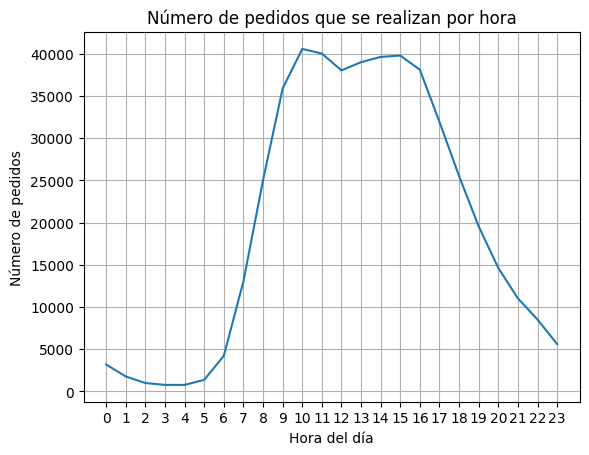

In [39]:
# Agrupar por pedidos por hora
pedidos_x_hora_group = insta_orders.groupby("order_hour_of_day")["user_id"].count()

# Graficar pedidos por hora
pedidos_x_hora_group.plot(title="Número de pedidos que se realizan por hora", xlabel="Hora del día", ylabel="Número de pedidos", grid= True);
plt.xticks(range(0, 24));

plt.show()

Escribe aquí tus conclusiones

**Las horas en que mas se realizan pedidos entre las 10am y 16pm**

<div class="alert alert-block alert-success"> 
<b>Comentario del Revisor #1</b> <a class="tocSkip"></a>

Excelente trabajo al visualizar los datos! Además, la comunicación de los resultados es clara y precisa: identificaste correctamente que la mayoría de los pedidos ocurren entre las 9:00 AM y las 5:00 PM, con picos a las 10:00 AM y las 3:00 PM. Esto proporciona una gran perspectiva sobre el comportamiento del cliente.

</div>

### [A3] ¿Qué día de la semana compran víveres las personas?

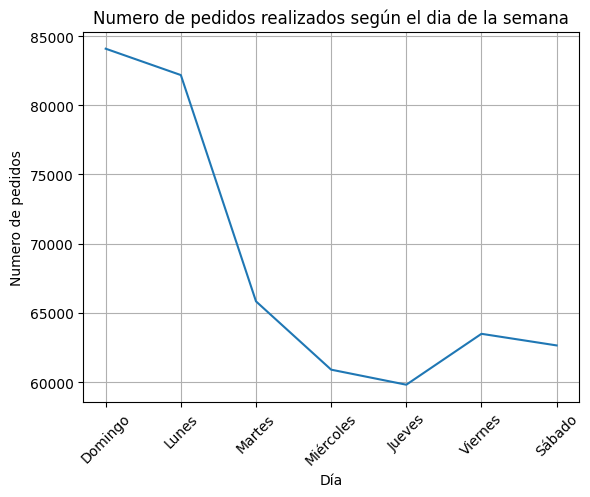

In [40]:
#Agrupar pedidos por día de la semana
pedidos_x_dia_group = insta_orders.groupby("order_dow")["user_id"].count()

# Cambiar el indice del eje X
pedidos_x_dia_group.index = ["Domingo", "Lunes", "Martes", "Miércoles", "Jueves", "Viernes", "Sábado"]

# Graficar pedidos por día
pedidos_x_dia_group.plot(title="Numero de pedidos realizados según el dia de la semana", xlabel="Día", ylabel="Numero de pedidos", grid=True, rot= 45)

plt.show()

Escribe aquí tus conclusiones

**Los en que más pedidos se realizan son los días domingo y lunes, y las razones pudieran ser que los domingos la mayor parte de la gente descansa y es cuando tienen tiempo y los lunes también es cuando compran las cosas para la semana las personas que no fueron el domingo**

<div class="alert alert-block alert-success"> 
<b>Comentario del Revisor #1</b> <a class="tocSkip"></a>

El gráfico ayuda a visualizar las tendencias claramente. Tu comunicación de resultados también es precisa: identificaste correctamente que, asumiendo que el domingo es 0, la mayoría de los pedidos se realizan el domingo y el lunes.

</div>

### [A4] ¿Cuánto tiempo esperan las personas hasta hacer otro pedido? Comenta sobre los valores mínimos y máximos.

Mínimo: 0 días
Máximo: 30 días
Promedio: 11 días aprox.
Mediana: 7 días


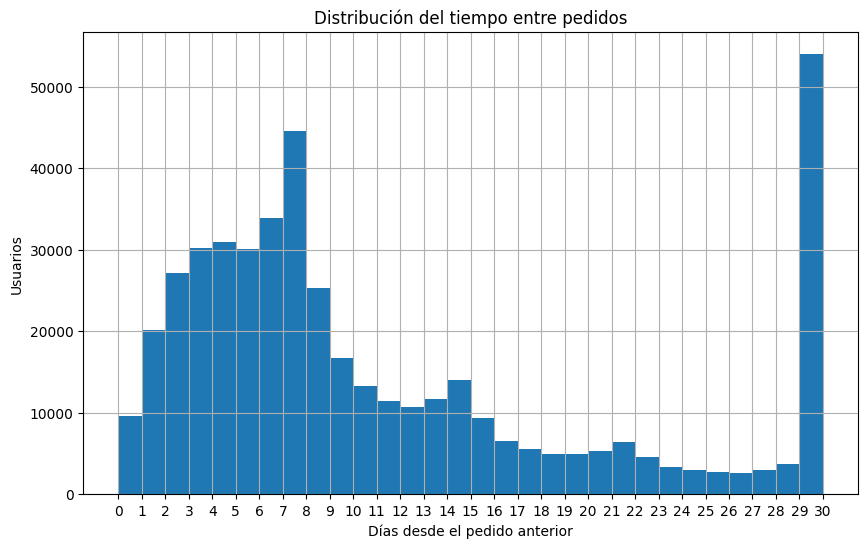

In [41]:
# Filtar clientes que no sea su primer pedido
clientes_recurrentes = insta_orders[insta_orders["days_since_prior_order"] != -1]

# Datos estadisticos
print(f"Mínimo: {clientes_recurrentes['days_since_prior_order'].min()} días")
print(f"Máximo: {clientes_recurrentes['days_since_prior_order'].max()} días")
print(f"Promedio: {clientes_recurrentes['days_since_prior_order'].mean():.0f} días aprox.")
print(f"Mediana: {clientes_recurrentes['days_since_prior_order'].median():.0f} días")

# Graficar días entre cada pedido que esperan los usuarios para volver a pedir X = Días Y = Cantidad de usuarios 
plt.figure(figsize=(10, 6))
plt.hist(clientes_recurrentes['days_since_prior_order'], bins=30)
plt.title("Distribución del tiempo entre pedidos")
plt.xlabel("Días desde el pedido anterior")
plt.ylabel("Usuarios")
plt.grid(True)
plt.xticks(range(0,31))

plt.show()

Escribe aquí tus conclusiones  
**Con este gráfico podemos apreciar que la mayoría de los usuarios esperan entre 1 y 10 días para realizar su siguiente pedido, o bien hasta 30 días.**

<div class="alert alert-block alert-success"> 
<b>Comentario del Revisor #1</b> <a class="tocSkip"></a>

Buen trabajo al visualizar los datos! Además, tu interpretación de los resultados es sólida

</div>

# [B] Intermedio (deben completarse todos para aprobar)

1. ¿Existe alguna diferencia entre las distribuciones `'order_hour_of_day'` de los miércoles y los sábados? Traza gráficos de barra de `'order_hour_of_day'` para ambos días en la misma figura y describe las diferencias que observes.
2. Grafica la distribución para el número de órdenes que hacen los clientes (es decir, cuántos clientes hicieron solo 1 pedido, cuántos hicieron 2, cuántos 3, y así sucesivamente...).
3. ¿Cuáles son los 20 principales productos que se piden con más frecuencia (muestra su identificación y nombre)?

### [B1] Diferencia entre miércoles y sábados para  `'order_hour_of_day'`. Traza gráficos de barra para los dos días y describe las diferencias que veas.

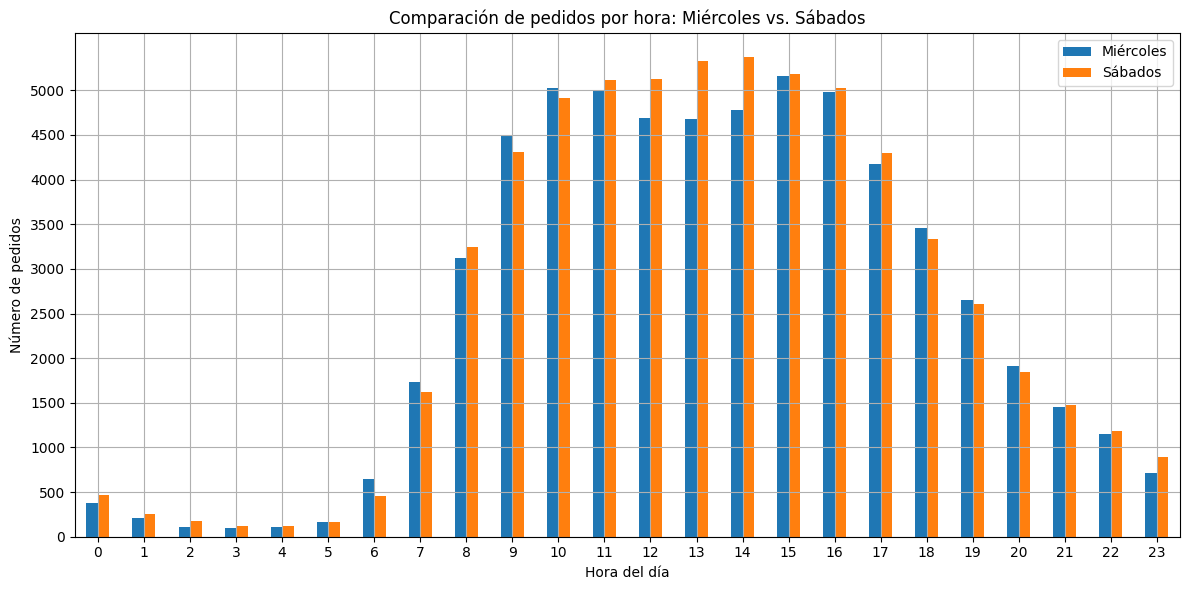

In [42]:
# Agrupar por día y hora
pedidos_por_dia_hora = insta_orders.groupby(['order_dow', 'order_hour_of_day']).size()

# Filtrar miércoles (3) y sábados (6)
miercoles_datos = pedidos_por_dia_hora[3]
sabados_datos = pedidos_por_dia_hora[6]

# Crear DataFrame con ambos días
comparacion = pd.DataFrame({
    'Miércoles': miercoles_datos,
    'Sábados': sabados_datos
})

# Crear grafico de barras agrupadas
comparacion.plot(title="Comparación de pedidos por hora: Miércoles vs. Sábados", xlabel="Hora del día", ylabel="Número de pedidos", kind='bar', figsize=(12, 6),rot=0, grid=True)
plt.tight_layout()
plt.yticks(range(0, 5500, 500))
plt.show()

<div class="alert alert-block alert-success"> 
<b>Comentario del Revisor #1</b> <a class="tocSkip"></a>

Identificaste correctamente una ligera disminución entre las 11h y las 13h los miércoles, que está ausente los sábados.

</div>

Escribe aquí tus conclusiones


**Pico de actividad similar, pero con mayor volumen los sábados:**
**Tanto miércoles como sábados muestran un pico de pedidos entre las 10:00 y 15:00 horas. Sin embargo, los sábados tienen ligeramente más pedidos que los miércoles durante esas horas, lo que sugiere mayor actividad general en fines de semana.**


**Actividad matutina más fuerte los sábados:**
**Desde las 6:00 a.m. hasta las 9:00 a.m., los pedidos en sábados superan claramente a los de miércoles. Esto puede deberse a que los sábados las personas tienen más tiempo libre y piden desde más temprano.**


### [B2] ¿Cuál es la distribución para el número de pedidos por cliente?

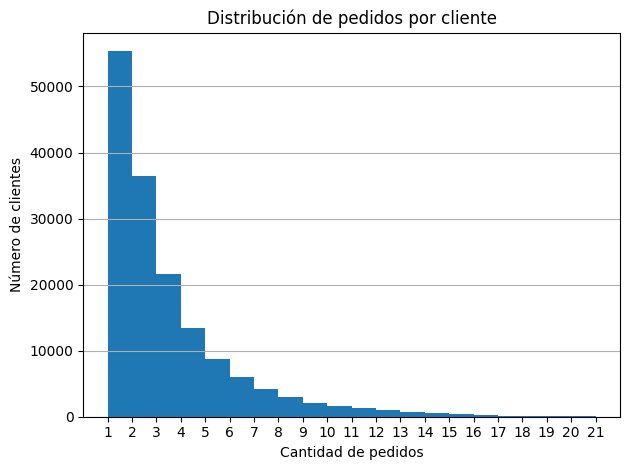

In [43]:
# Agrupar por pedidos por ID de Cliente
pedidos_x_cliente = insta_orders.groupby("user_id").size()

#Graficar pedidos por ID de cliente 
plt.hist(pedidos_x_cliente, bins=range(1, 22))  # Evita barras pegadas
plt.title("Distribución de pedidos por cliente")
plt.xlabel("Cantidad de pedidos")
plt.ylabel("Número de clientes")
plt.xticks(range(1, 22))
plt.grid(axis='y')
plt.tight_layout()
plt.show()


Escribe aquí tus conclusiones

**La mayoría de los clientes hace solo 1 pedido, hay más de 50,000 clientes que hicieron solo un pedido.**
Disminución rápida en la frecuencia a medida que aumentan los pedidos, a medida que sube el número de pedidos por cliente, la cantidad de clientes cae drásticamente.
Muy pocos clientes hacen 5 o más pedidos.
Hay un pequeño número de clientes que realizaron entre 10 y 20 pedidos.
**Esto indica que una gran parte de los usuarios son clientes únicos o esporádicos. Y pocos son clientes recurrentes. 
Lo cual me podria llegar a hacer pensar que si existe una promoción por cliente nuevo esta sea la razón, pues lo clientes compran una vez aprovechan el descuento de ingreso y no vuelven a comprar, hay que reforzar la campaña para clientes frecuentes.**


### [B3] ¿Cuáles son los 20 productos más populares (muestra su ID y nombre)?

In [44]:
# Agrupar productos por ID de producto, dimensionar cuantas filas tiene cada grupo con size, cambiar el nombre del campo de conteo y ordenar valores del mayor a menor
productos_populares = (order_products.groupby("product_id").size().reset_index(name='veces_pedido').sort_values('veces_pedido', ascending=False))

# Fusionar datos por los valores de columna "product_id"
productos_populares = productos_populares.merge(products, on='product_id')
print(productos_populares.head())

   product_id  veces_pedido            product_name  aisle_id  department_id  \
0       24852         66050                  Banana        24              4   
1       13176         53297  Bag of Organic Bananas        24              4   
2       21137         37039    Organic Strawberries        24              4   
3       21903         33971    Organic Baby Spinach       123              4   
4       47209         29773    Organic Hass Avocado        24              4   

       product_name_upper  
0                  BANANA  
1  BAG OF ORGANIC BANANAS  
2    ORGANIC STRAWBERRIES  
3    ORGANIC BABY SPINACH  
4    ORGANIC HASS AVOCADO  


In [45]:
# Crear un DataFrame unicamente con las columnas que necesito
top_20 = productos_populares[['product_id', 'product_name']]

# Reasignar valores del indice para que empiece en 1 y no en cero y sea mas comprensible para el publico
top_20.index = top_20.index + 1

# Cambiar el nombre de las columnas por nombres mas descriptivos para el publico
top_20.columns = ["ID del Producto", "Nombre del Producto"]
print(top_20.head(20))

    ID del Producto       Nombre del Producto
1             24852                    Banana
2             13176    Bag of Organic Bananas
3             21137      Organic Strawberries
4             21903      Organic Baby Spinach
5             47209      Organic Hass Avocado
6             47766           Organic Avocado
7             47626               Large Lemon
8             16797              Strawberries
9             26209                     Limes
10            27845        Organic Whole Milk
11            27966       Organic Raspberries
12            22935      Organic Yellow Onion
13            24964            Organic Garlic
14            45007          Organic Zucchini
15            39275       Organic Blueberries
16            49683            Cucumber Kirby
17            28204        Organic Fuji Apple
18             5876             Organic Lemon
19             8277  Apple Honeycrisp Organic
20            40706    Organic Grape Tomatoes


Escribe aquí tus conclusiones

**Gracias al Top_20 podemos apreciar que la gran mayoría de los productos top son organicos. Y casi todos son del departmento de frutas y verduras**
**Esto sugiere una fuerte preferencia del cliente por productos orgánicos, lo que puede ser clave para estrategias de marketing, promociones o surtido de inventario.**

**Esto indica que los clientes usan esta plataforma principalmente para comprar alimentos frescos.**

<div class="alert alert-block alert-success"> 
<b>Comentario del Revisor #1</b> <a class="tocSkip"></a>

Correcto! Los productos populares se listan correctamente. Sin duda las bananas y los productos orgánicos en general son los "populares".

<div class="alert alert-block alert-warning"> 
<b>Comentario del Revisor #1</b> <a class="tocSkip"></a>

En el análisis de productos más populares ([B3]), sería útil añadir una visualización tipo gráfico de barras para complementar la tabla y facilitar una lectura rápida del ranking. Esto también permitiría detectar patrones visuales como posibles productos muy por encima del resto.

</div>

</div>

# [C] Difícil (deben completarse todos para aprobar)

1. ¿Cuántos artículos suelen comprar las personas en un pedido? ¿Cómo es la distribución?
2. ¿Cuáles son los 20 principales artículos que vuelven a pedirse con mayor frecuencia (muestra sus nombres e IDs de los productos)?
3. Para cada producto, ¿cuál es la tasa de repetición del pedido (número de repeticiones de pedido/total de pedidos?
4. Para cada cliente, ¿qué proporción de los productos que pidió ya los había pedido? Calcula la tasa de repetición de pedido para cada usuario en lugar de para cada producto.
5. ¿Cuáles son los 20 principales artículos que la gente pone primero en sus carritos (muestra las IDs de los productos, sus nombres, y el número de veces en que fueron el primer artículo en añadirse al carrito)?

### [C1] ¿Cuántos artículos compran normalmente las personas en un pedido? ¿Cómo es la distribución?

In [46]:
# Agrupar por order_id y dimensionar cuantas filas de productos tiene cada orden con size
cant_productos_x_pedido = order_products.groupby("order_id").size()

In [47]:
# Calcular datos estadisticos (Minimo, Maximo, Promedio, Mediana)
cant_productos_x_pedido.describe()

count    450046.000000
mean         10.098983
std           7.540206
min           1.000000
25%           5.000000
50%           8.000000
75%          14.000000
max         127.000000
dtype: float64

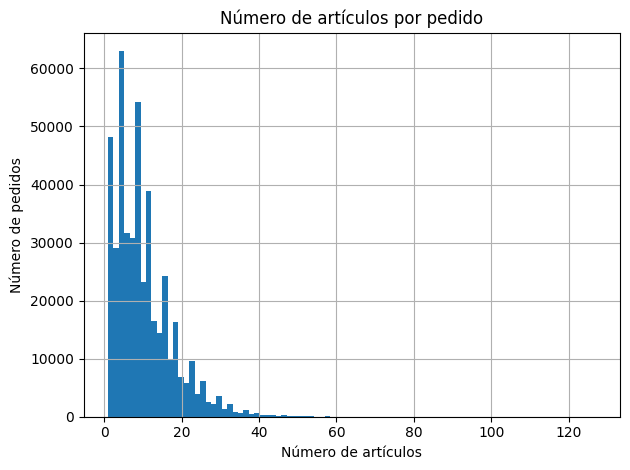

In [48]:

# Graficar cuantos articulos tiene cada orden con un histograma para analizar la distribuicion
plt.hist(cant_productos_x_pedido, bins=90)
plt.title("Número de artículos por pedido")
plt.xlabel("Número de artículos")
plt.ylabel("Número de pedidos")
plt.grid(True)
plt.tight_layout();
plt.show()



Los resultados del análisis muestran que la mayoría de los pedidos contienen una cantidad moderada de artículos:

**DATOS ESTADISTICOS**
**Promedio: 10 artículos por pedido**

**Mediana: 8 artículos, lo que indica que la mitad de los pedidos tienen menos de esa cantidad.** 

**Mínimo: 1 artículo (el valor más bajo posible).**

**Máximo: 127 artículos, un valor atípico que sugiere la existencia de algunos pedidos excepcionalmente grandes.**

**En general, el gráfico revela que aproximadamente el 80% de los pedidos concentran entre 1 y 20 artículos, mostrando una distribución asimétrica positiva (con pocos pedidos muy grandes que elevan la media).**
**Esto sugiere que la mayoría de los clientes realizan compras pequeñas o medianas, mientras que solo un grupo reducido realiza pedidos muy grandes.**

### [C2] ¿Cuáles son los 20 principales artículos que vuelven a pedirse con mayor frecuencia (muestra sus nombres e IDs de los productos)?

In [49]:
# Filtrar productos que se han ordenado mas de una vez por cliente (que se estan volviendo a pedir, reordered = 1)
products_reordered = order_products[order_products["reordered"] == 1]

In [50]:
# Agrupar productos por product_id, dimensionar cuantas filas tiene cada grupo con size, cambiar el nombre del campo de conteo y ordenar valores del mayor a menor
reordered_grouped = products_reordered.groupby("product_id").size().reset_index(name = "veces_pedido").sort_values("veces_pedido", ascending=False)

In [51]:
# Unir order_products con products para obtener el nombre con merge por product_id
df_top_20_reordered = reordered_grouped.merge(products, on = "product_id")

# filtrar unicamente en una variable los 20 productos mas pedidos
top_20_reordered = df_top_20_reordered[["product_id", "product_name"]].head(20)

# Renombar titulos de las columnas y resetear el index para que sea mas comprensible para el publico
top_20_reordered.index = top_20_reordered.index + 1
top_20_reordered.columns = ["ID del producto", "Nombre del producto"]
print("TOP 20 PRODUCTOS QUE LOS CLIENTES VOLVIERON A ORDENAR")
print(top_20_reordered)

TOP 20 PRODUCTOS QUE LOS CLIENTES VOLVIERON A ORDENAR
    ID del producto       Nombre del producto
1             24852                    Banana
2             13176    Bag of Organic Bananas
3             21137      Organic Strawberries
4             21903      Organic Baby Spinach
5             47209      Organic Hass Avocado
6             47766           Organic Avocado
7             27845        Organic Whole Milk
8             47626               Large Lemon
9             27966       Organic Raspberries
10            16797              Strawberries
11            26209                     Limes
12            22935      Organic Yellow Onion
13            24964            Organic Garlic
14            45007          Organic Zucchini
15            49683            Cucumber Kirby
16            28204        Organic Fuji Apple
17             8277  Apple Honeycrisp Organic
18            39275       Organic Blueberries
19             5876             Organic Lemon
20            49235       

Escribe aquí tus conclusiones

**Mi primera impresión fue que eran los mismos productos y pense que estaban mal, pero despues de analizarlo tiene sentido.**

#### **¿Por qué son similares?**
**Los productos más populares tienden a ser reordenados más frecuentemente:**  
**- Si un producto es muy popular (como las bananas), es lógico que también sea frecuentemente reordenado**  
**- Los clientes que compran estos productos una vez, tienden a comprarlos nuevamente**

<div class="alert alert-block alert-success"> 
<b>Comentario del Revisor #1</b> <a class="tocSkip"></a>

Impecable, los resultados sobre los productos que vuelven a pedirse con mayor frecuenciason los esperados. Los plátanos siguen dominando. 

</div>

### [C3] Para cada producto, ¿cuál es la proporción de las veces que se pide y que se vuelve a pedir?

In [52]:
# Total de veces que se pidió cada producto (ya lo habia calculado en la parte [B3] y la variable es productos_populares)
# productos_populares

In [53]:
# Total de reórdenes por producto (lo calcule en el paso anterior [C2] y la variable es reordered_grouped)
# reordered_grouped

In [54]:
# Unir ambos conteos
proporcion_reorden = productos_populares.merge(reordered_grouped, on='product_id', how='left')
proporcion_reorden.columns = ['product_id', 'veces_pedido', 'product_name', 'aisle_id',
       'department_id', 'product_name_upper', 'veces_reorden']
print(proporcion_reorden.head())

   product_id  veces_pedido            product_name  aisle_id  department_id  \
0       24852         66050                  Banana        24              4   
1       13176         53297  Bag of Organic Bananas        24              4   
2       21137         37039    Organic Strawberries        24              4   
3       21903         33971    Organic Baby Spinach       123              4   
4       47209         29773    Organic Hass Avocado        24              4   

       product_name_upper  veces_reorden  
0                  BANANA        55763.0  
1  BAG OF ORGANIC BANANAS        44450.0  
2    ORGANIC STRAWBERRIES        28639.0  
3    ORGANIC BABY SPINACH        26233.0  
4    ORGANIC HASS AVOCADO        23629.0  


In [55]:
#Rellenar valores de veces_reorden para corregir el tipo de datos por los datos ausentes
# Llenar NaN con 0 (productos que nunca se reordenaron)
proporcion_reorden['veces_reorden'] = proporcion_reorden['veces_reorden'].fillna(0)
proporcion_reorden['veces_reorden'] = proporcion_reorden['veces_reorden'].astype(int)
# Calcular la proporción
proporcion_reorden['proporcion_reorden'] = proporcion_reorden['veces_reorden'] / proporcion_reorden['veces_pedido']

print(proporcion_reorden.head())

   product_id  veces_pedido            product_name  aisle_id  department_id  \
0       24852         66050                  Banana        24              4   
1       13176         53297  Bag of Organic Bananas        24              4   
2       21137         37039    Organic Strawberries        24              4   
3       21903         33971    Organic Baby Spinach       123              4   
4       47209         29773    Organic Hass Avocado        24              4   

       product_name_upper  veces_reorden  proporcion_reorden  
0                  BANANA          55763            0.844254  
1  BAG OF ORGANIC BANANAS          44450            0.834006  
2    ORGANIC STRAWBERRIES          28639            0.773212  
3    ORGANIC BABY SPINACH          26233            0.772217  
4    ORGANIC HASS AVOCADO          23629            0.793639  


In [56]:
resumen_proporcion_reorden = proporcion_reorden [["product_id", "product_name", "veces_pedido", "veces_reorden", "proporcion_reorden"]]
resumen_proporcion_reorden.index = resumen_proporcion_reorden.index + 1
print(resumen_proporcion_reorden.head(20))

    product_id              product_name  veces_pedido  veces_reorden  \
1        24852                    Banana         66050          55763   
2        13176    Bag of Organic Bananas         53297          44450   
3        21137      Organic Strawberries         37039          28639   
4        21903      Organic Baby Spinach         33971          26233   
5        47209      Organic Hass Avocado         29773          23629   
6        47766           Organic Avocado         24689          18743   
7        47626               Large Lemon         21495          15044   
8        16797              Strawberries         20018          13945   
9        26209                     Limes         19690          13327   
10       27845        Organic Whole Milk         19600          16251   
11       27966       Organic Raspberries         19197          14748   
12       22935      Organic Yellow Onion         15898          11145   
13       24964            Organic Garlic         15

Escribe aquí tus conclusiones  
**La mayoría de los productos presentan una alta proporción de reorden, entre 65% y 85%, lo que indica que los clientes tienden a volver a pedir los mismos artículos con frecuencia.**  
**Destacan 3 productos arriba del 80% de reorden banana, Bag of Organic Bananas y  Organic Whole Milk**

### [C4] Para cada cliente, ¿qué proporción de sus productos ya los había pedido?

In [57]:
# Crear un dataframe con todos los datos necesarios uniendo order_products con insta_orders para tener user_id
order_products_users = order_products.merge(insta_orders[['order_id', 'user_id']], on='order_id')

In [58]:
# Agrupar por order_id para contar productos por pedido
productos_por_pedido = order_products_users.groupby(['order_id', 'user_id']).agg({
    'product_id': 'count',  # Total de productos en el pedido
    'reordered': 'sum'      # Productos que fueron reordenados
}).reset_index()

# Renombrar columnas
productos_por_pedido.columns = ['order_id', 'user_id', 'total_productos', 'productos_reordenados']
# Agregar columna de proporción
productos_por_pedido['proporcion_reordenados'] = productos_por_pedido['productos_reordenados'] / productos_por_pedido['total_productos']
print(productos_por_pedido.head())
print()
print("DATOS ESTADISTICOS")
print(productos_por_pedido['proporcion_reordenados'].describe())

   order_id  user_id  total_productos  productos_reordenados  \
0         4   178520               13                     12   
1         9   139016               15                     10   
2        11   143742                5                      5   
3        19    83009                3                      3   
4        20   182912                8                      0   

   proporcion_reordenados  
0                0.923077  
1                0.666667  
2                1.000000  
3                1.000000  
4                0.000000  

DATOS ESTADISTICOS
count    450046.000000
mean          0.599553
std           0.337844
min           0.000000
25%           0.333333
50%           0.666667
75%           0.909091
max           1.000000
Name: proporcion_reordenados, dtype: float64


Escribe aquí tus conclusiones  
**La mayoría de los clientes tiende a repetir sus compras, con un promedio del 60% de productos reordenados por pedido.**

**- 25% de los pedidos tienen menos de 33% de productos reordenados (clientes explorando nuevos productos)**  
**- 75% de los pedidos tienen más de 91% de productos reordenados (clientes muy fieles a sus productos habituales)**
#### Patrones de compra: 
#### Los clientes muestran una fuerte tendencia a mantener una "lista base" de productos que compran regularmente, complementándola ocasionalmente con productos nuevos.

<div class="alert alert-block alert-success"> 
<b>Comentario del Revisor #1</b> <a class="tocSkip"></a>

Correcto! Muy buen trabajo

</div>

### [C5] ¿Cuáles son los 20 principales artículos que las personas ponen primero en sus carritos?

In [59]:
# Filtrar productos que se añadieron primero al carrito
first_products = order_products[order_products['add_to_cart_order'] == 1]
print(f"Número de productos que se pusieron primero: {len(first_products)}")

Número de productos que se pusieron primero: 450046


In [60]:
# Contar cuántas veces cada producto fue puesto primero
first_product_counts = first_products['product_id'].value_counts()

# Convertir Series a DataFrame para corregir error de merge
df_first_product_counts = first_product_counts.reset_index()
df_first_product_counts.columns = ['product_id', 'count']

# Completar nombres uniendo dataframes con merge
df_first_product_counts = df_first_product_counts.merge(products[['product_id', 'product_name']], on='product_id')
top_20_first_product_counts = df_first_product_counts.head(20)
top_20_first_product_counts.columns = ["ID del Producto", "# de veces pedido en 1er Lugar", "Nombre del Producto"]
top_20_first_product_counts.index = top_20_first_product_counts.index + 1
top_20_first_product_counts

,ID del Producto,# de veces pedido en 1er Lugar,Nombre del Producto
1,24852,15562,Banana
2,13176,11026,Bag of Organic Bananas
3,27845,4363,Organic Whole Milk
4,21137,3946,Organic Strawberries
5,47209,3390,Organic Hass Avocado
6,21903,3336,Organic Baby Spinach
7,47766,3044,Organic Avocado
8,19660,2336,Spring Water
9,16797,2308,Strawberries
10,27966,2024,Organic Raspberries


Escribe aquí tus conclusiones  
**Los productos que más se añaden primero al carrito suelen ser artículos básicos y de consumo frecuente (como frutas, verduras, productos lácteos, y bebidas)**

<div class="alert alert-block alert-success"> 
<b>Comentario del Revisor #1</b> <a class="tocSkip"></a>

Los 20 principales artículos que las personas ponen primero en sus carritos se listan correctamente y los conteos son los esperados. Se ve una tendencia por comenzar por los plátanos y productos orgánicos. 

</div>

# Conclusión general

El análisis revela patrones claros en el comportamiento de compra de los usuarios.  
La mayoría de los pedidos se concentran entre las **10:00 a.m. y 4:00 p.m.**, especialmente los **domingos y lunes**, días asociados al descanso o al inicio de la semana.  
Además, la mayoría de los clientes **espera entre 1 y 10 días** para hacer un nuevo pedido, aunque algunos pueden tardar hasta 30 días.

La **actividad matutina es más fuerte los sábados**, cuando los usuarios disponen de más tiempo libre.  

La mayoría de los clientes realiza **solo un pedido**, lo que sugiere que muchos podrían estar aprovechando **promociones para nuevos usuarios** y no regresan.  
Esto indica la necesidad de fortalecer estrategias de **fidelización y recompra**.

En cuanto a los productos, los **más vendidos y más reordenados** son principalmente **orgánicos y frescos**, especialmente frutas y verduras, lo que demuestra una **preferencia por alimentos saludables y de consumo frecuente**.  
Los artículos básicos como **bananas** y **leche orgánica** destacan por su alta tasa de recompra, superior al **80%**.

A nivel de pedidos, la mayoría contiene entre **1 y 20 artículos**, con un promedio de **10 productos por orden**, lo que refleja **compras pequeñas o medianas** típicas de reposición.  
Además, los clientes muestran una **alta fidelidad** en sus hábitos: alrededor del **60% de los productos por pedido son reordenados**, y en un **75% de los casos**, los pedidos superan el **90% de productos habituales**.  
  
  

## Insights Principales del Análisis de Pedidos

### 1. Alta recompra de productos, baja recompra de usuarios
Los clientes son fieles a los productos, pero no a la plataforma.  
**Recomendación:** Implementar estrategias de retención post-compra y programas de lealtad.

---

### 2. Picos de pedidos entre 10 a.m. y 4 p.m., domingos y lunes
Los clientes tienden a comprar cuando tienen más tiempo libre o al iniciar la semana.  
**Recomendación:** Aprovechar los picos con campañas de alta conversión en el horario con alto trafico y, al mismo tiempo, fomentar compras en horarios y días de baja actividad mediante promociones especiales o descuentos exclusivos.

---

### 3. Pedidos pequeños con promedio de 10 productos
La mayoría de los pedidos son de tamaño moderado, entre 1 y 20 artículos.  
**Recomendación:** Ofrecer beneficios o envíos gratis para incentivar compras más grandes.

---

### 4. Preferencia por productos básicos y orgánicos
El top de productos más vendidos corresponde principalmente a frutas, verduras y lácteos orgánicos.  
**Recomendación:** Potenciar la categoría *Healthy* y ofrecer suscripciones automáticas. Así como  campañas publicitarias enfocadas en categoria **Healty**.

---

### 5. Clientes conservadores en su elección de productos
La mayoría repite los mismos artículos, explorando poco los nuevos.  
**Recomendación:** Aplicar estrategias de venta cruzada y recomendaciones personalizadas para aumentar la variedad de compra.

